In [1]:
import numpy as np
import sympy as sp

In [2]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [3]:
from sympy.abc import t

# **Model Question**

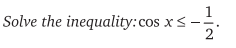
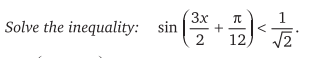

$\forall x \in \{x| x \in \mathbb {R}, -2\pi \leq x \leq 2\pi \}$

1. find the zeros of the functions.
2. find the crosses of two functions
3. sketch the two functions.
4. plot the zeoros and crosses of the two functions.
5. plot the inequality regions and shade out them.


(i) Zeros

In [4]:
f = sp.cos(t)
f

cos(t)

In [5]:
g = sp.sin((3*t/2)+sp.pi/12)
g

sin(3*t/2 + pi/12)

In [6]:
fz = sp.solveset(f,t,sp.Interval(-2*sp.pi,2*sp.pi))
fz

{-3*pi/2, -pi/2, pi/2, 3*pi/2}

In [7]:
gz = sp.solveset(g,t,sp.Interval(-2*sp.pi,2*sp.pi))
gz

{-4*pi/3 + 2*atan((-sqrt(6) + sqrt(2))/(sqrt(2) + sqrt(6)))/3, -2*pi/3 + 2*atan((-sqrt(2) + sqrt(6))/(-sqrt(6) - sqrt(2)))/3, 2*atan((-sqrt(2) + sqrt(6))/(-sqrt(6) - sqrt(2)))/3 + 2*pi/3, 2*atan((-sqrt(2) + sqrt(6))/(-sqrt(6) - sqrt(2)))/3 + 2*pi, 2*atan((-sqrt(6) + sqrt(2))/(sqrt(2) + sqrt(6)))/3 + 4*pi/3, 2*atan((-sqrt(6) + sqrt(2))/(sqrt(2) + sqrt(6)))/3}

In [8]:
gz = [i.simplify() for i in gz]
gz

[-pi/18, -25*pi/18, 23*pi/18, -13*pi/18, 11*pi/18, 35*pi/18]

(ii) Crosses

In [9]:
eq = sp.Eq(f,g)
eq

Eq(cos(t), sin(3*t/2 + pi/12))

In [10]:
cr = sp.solveset(eq,t,sp.Interval(-2*sp.pi,2*sp.pi)).doit()
cr

ConditionSet(t, Eq(-sin(3*t/2 + pi/12) + cos(t), 0), Reals)

In [11]:
cr = sp.solve(eq,t)
cr

[pi/6,
 5*pi/6,
 -2*I*log(-(1 - I)*(sqrt(2) + sqrt(10) + 2*sqrt(3)*sqrt(5 - sqrt(5)) - 2*I*sqrt(5 - sqrt(5)) + sqrt(6)*I + sqrt(30)*I)/16),
 -2*I*log(-(1 - I)*(-2*sqrt(3)*sqrt(5 - sqrt(5)) + sqrt(2) + sqrt(10) + sqrt(6)*I + 2*I*sqrt(5 - sqrt(5)) + sqrt(30)*I)/16),
 -2*I*log(-(1 - I)*(-2*sqrt(3)*sqrt(sqrt(5) + 5) - sqrt(10) + sqrt(2) - sqrt(30)*I + sqrt(6)*I + 2*I*sqrt(sqrt(5) + 5))/16),
 -2*I*log((1 - I)*(-2*sqrt(3)*sqrt(sqrt(5) + 5) - sqrt(2) + sqrt(10) - sqrt(6)*I + 2*I*sqrt(sqrt(5) + 5) + sqrt(30)*I)/16)]

In [12]:
cr[0].n()

0.523598775598299

In [13]:
cr = [i.n() for i in cr]
cr

[0.523598775598299,
 2.61799387799149,
 5.55014702134197,
 -4.50294947014537,
 -1.98967534727354,
 3.03687289847013]

(iii),(iv),(v) Plots

In [14]:
x = np.linspace(-2*np.pi,2*np.pi,1000)

In [15]:
fy = np.array([float(f.subs(t,i)) for i in x])
gy = np.array([float(g.subs(t,i)) for i in x])

In [16]:
fz = [float(i) for i in fz]
fz

[-4.71238898038469, -1.5707963267948966, 1.5707963267948966, 4.71238898038469]

In [17]:
gz = [float(i) for i in gz]
gz

[-0.17453292519943295,
 -4.363323129985824,
 4.014257279586958,
 -2.2689280275926285,
 1.9198621771937625,
 6.1086523819801535]

In [18]:
cr

[0.523598775598299,
 2.61799387799149,
 5.55014702134197,
 -4.50294947014537,
 -1.98967534727354,
 3.03687289847013]

In [19]:
cry = np.array([float(f.subs(t,i)) for i in cr])
cry

array([ 0.8660254 , -0.8660254 ,  0.74314483, -0.20791169, -0.40673664,
       -0.9945219 ])

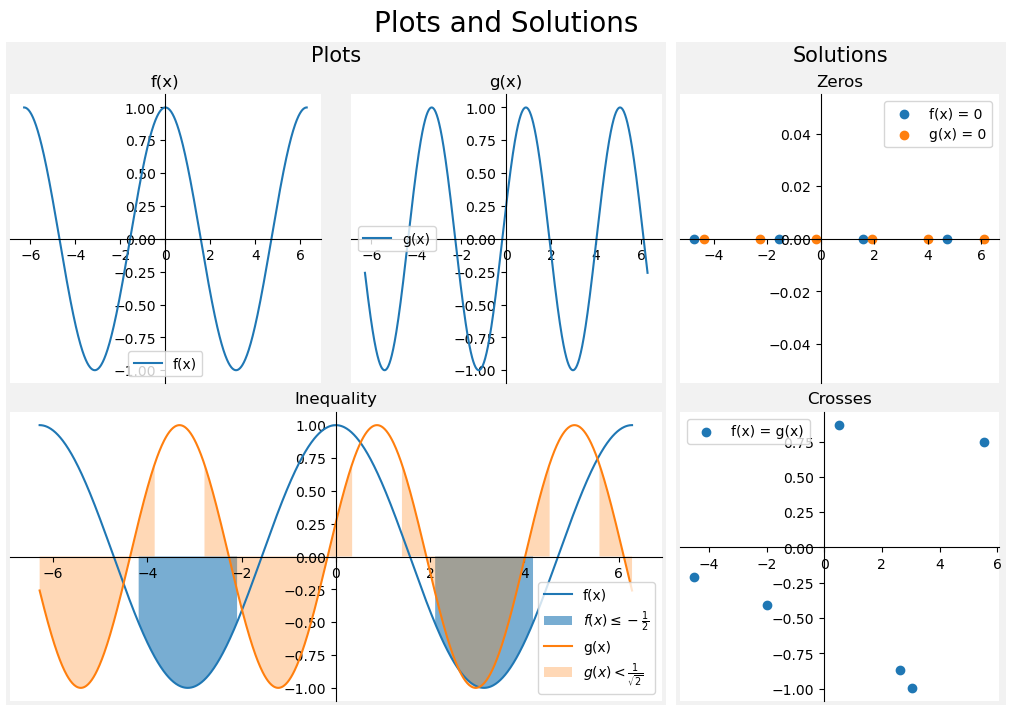

In [20]:
fig = plt.figure(figsize = (10,7), layout = 'constrained')

sf = fig.subfigures(1,2, width_ratios = [2,1], facecolor = '.95')

gs = GridSpec(2,2, figure = sf[0])

ax1 = sf[0].add_subplot(gs[0,0])
ax2 = sf[0].add_subplot(gs[0,1])
ax3 = sf[0].add_subplot(gs[1,:])

ax4,ax5 = sf[1].subplots(2,1)

ax1.plot(x,fy, label = 'f(x)')
ax2.plot(x,gy, label = 'g(x)')

ax4.scatter(fz,[0]*len(fz), label = 'f(x) = 0')
ax4.scatter(gz,[0]*len(gz), label = 'g(x) = 0')
ax5.scatter(cr,cry, label = 'f(x) = g(x)')

ax3.plot(x,fy, label = 'f(x)')
ax3.fill_between(x,fy,where =( fy <= -1/2), alpha = 0.6, label = r'$f(x) \leq -\frac{1}{2}$')
ax3.plot(x,gy, label = 'g(x)')
ax3.fill_between(x,gy,where =( gy < 1/np.sqrt(2)), alpha = 0.3, label = r'$g(x) < \frac{1}{\sqrt{2}}$')

ax = [ax1,ax2,ax3,ax4,ax5]
title = ['f(x)','g(x)','Inequality','Zeros','Crosses']

for i,j in zip(ax,title):
    i.legend()
    i.spines[['left','bottom']].set_position('zero')
    i.spines[['top','right']].set_visible(False)
    i.set_title(j)

sf[0].suptitle('Plots', fontsize = 15)
sf[1].suptitle('Solutions', fontsize = 15)

fig.suptitle('Plots and Solutions', fontsize = 20)
    
plt.show()

# **Question 1:**

You're given:

\begin{align*}
f:x & \mapsto \frac{x+1}{x^2 + 3}\\
g:x & \mapsto -e^{-\frac{t^2}{10}} \sin(3x) \cos(3x)
\end{align*}

$\forall$  $x$  $\{x| x \in \mathbb {R}, -10 \leq x \leq 10 \}$

1. Find zeros of each function.
2. Find crosses of two functions.
3. Sketch the two functions.
4. plot the zeros and crosses.
5. shade out the region where $f(x) > g(x)$ where $\forall x$ $\{ x| 2.5 \leq x \leq 7.5\}$

# **Question 2:**

You're given:

\begin{align*}
f:x & \mapsto x^2 e^{\frac{x^2}{40}} \sin(3x)\\
g:x & \mapsto \frac{1}{2}\sin^{-1}(x) \cos(x-3) \sin(4x)
\end{align*}

$\forall$  $x$  $\{x| x \in \mathbb {R}, -1 \leq x \leq 1 \}$

1. Find zeros of each function.
2. Find crosses of two functions.
3. Sketch the two functions.
4. plot the zeros and crosses.
5. shade out the region where $f(x) > g(x)$
6. shade out the region where $f(x) < g(x)$